In [1]:
import os
import pandas
import json
import glob

In [5]:
metadat_apth = "/data4/soumya/MSF_forum/dataset"
metadata_files = glob.glob(metadat_apth + "/*/*")
print(len(metadata_files))

545


In [13]:
count_mixes = {}
for metadata_file in metadata_files:
    count = len(glob.glob(metadata_file + "/*"))
    count_mixes[metadata_file] = count

In [15]:
# count the number of occurances of each count and plot to get a sense of mixes per song
count_mixes = pandas.Series(count_mixes)
# add column names
count_mixes = count_mixes.reset_index()
count_mixes.columns = ['metadata_path', 'count']
print(count_mixes)


                                         metadata_path  count
0    /data4/soumya/MSF_forum/dataset/Discussion Zon...     26
1    /data4/soumya/MSF_forum/dataset/Discussion Zon...     13
2    /data4/soumya/MSF_forum/dataset/Discussion Zon...     17
3    /data4/soumya/MSF_forum/dataset/Discussion Zon...     13
4    /data4/soumya/MSF_forum/dataset/Discussion Zon...     23
..                                                 ...    ...
540  /data4/soumya/MSF_forum/dataset/Discussion Zon...    124
541  /data4/soumya/MSF_forum/dataset/Discussion Zon...      5
542  /data4/soumya/MSF_forum/dataset/Discussion Zon...     44
543  /data4/soumya/MSF_forum/dataset/Discussion Zon...     28
544  /data4/soumya/MSF_forum/dataset/Discussion Zon...     48

[545 rows x 2 columns]


In [ ]:

# reset index
count_mixes = count_mixes.reset_index(drop=True)
print(count_mixes.head(10))


                                       metadata_path  count
0  /data4/soumya/MSF_forum/dataset/Discussion Zon...    707
1  /data4/soumya/MSF_forum/dataset/Discussion Zon...    311
2  /data4/soumya/MSF_forum/dataset/Discussion Zon...    290
3  /data4/soumya/MSF_forum/dataset/Discussion Zon...    290
4  /data4/soumya/MSF_forum/dataset/Discussion Zon...    245
5  /data4/soumya/MSF_forum/dataset/Discussion Zon...    240
6  /data4/soumya/MSF_forum/dataset/Discussion Zon...    232
7  /data4/soumya/MSF_forum/dataset/Discussion Zon...    227
8  /data4/soumya/MSF_forum/dataset/Discussion Zon...    211
9  /data4/soumya/MSF_forum/dataset/Discussion Zon...    207


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=count_mixes["count"])
plt.show()

In [37]:
# generate vertical boxplot per genre (present in dirname(metadata_path))
count_mixes['genre'] = count_mixes['metadata_path'].apply(lambda x: x.split('/')[-2]).replace("Discussion Zone - ", "")
print(count_mixes.head(10))

                                       metadata_path  count  \
0  /data4/soumya/MSF_forum/dataset/Discussion Zon...    707   
1  /data4/soumya/MSF_forum/dataset/Discussion Zon...    311   
2  /data4/soumya/MSF_forum/dataset/Discussion Zon...    290   
3  /data4/soumya/MSF_forum/dataset/Discussion Zon...    290   
4  /data4/soumya/MSF_forum/dataset/Discussion Zon...    245   
5  /data4/soumya/MSF_forum/dataset/Discussion Zon...    240   
6  /data4/soumya/MSF_forum/dataset/Discussion Zon...    232   
7  /data4/soumya/MSF_forum/dataset/Discussion Zon...    227   
8  /data4/soumya/MSF_forum/dataset/Discussion Zon...    211   
9  /data4/soumya/MSF_forum/dataset/Discussion Zon...    207   

                                               genre  
0                Discussion Zone - Rock, Punk, Metal  
1           Discussion Zone - Pop, Singer-Songwriter  
2                Discussion Zone - Rock, Punk, Metal  
3                Discussion Zone - Rock, Punk, Metal  
4                Discussion Zon

In [38]:
# count the range of number of mixes per genre
count_mixes.groupby('genre')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
"Discussion Zone - Acoustic, Jazz, Country, Orchestral",116.0,51.818966,38.754433,1.0,22.00,42.0,70.50,167.0
"Discussion Zone - Alt Rock, Blues, Country Rock, Indie, Funk, Reggae",108.0,54.712963,41.089611,0.0,25.00,46.5,71.75,211.0
"Discussion Zone - Electronica, Dance, Experimental, Spoken Word",82.0,26.548780,27.671866,2.0,13.25,18.5,28.75,158.0
"Discussion Zone - Hip-hop, R&B, Soul",28.0,68.285714,60.956485,13.0,26.00,34.5,103.50,232.0
"Discussion Zone - Pop, Singer-Songwriter",101.0,68.831683,50.062974,1.0,35.00,53.0,92.00,311.0
"Discussion Zone - Rock, Punk, Metal",110.0,76.227273,87.419862,1.0,29.25,45.0,100.75,707.0


/tmp/ipykernel_3555853/4073795178.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


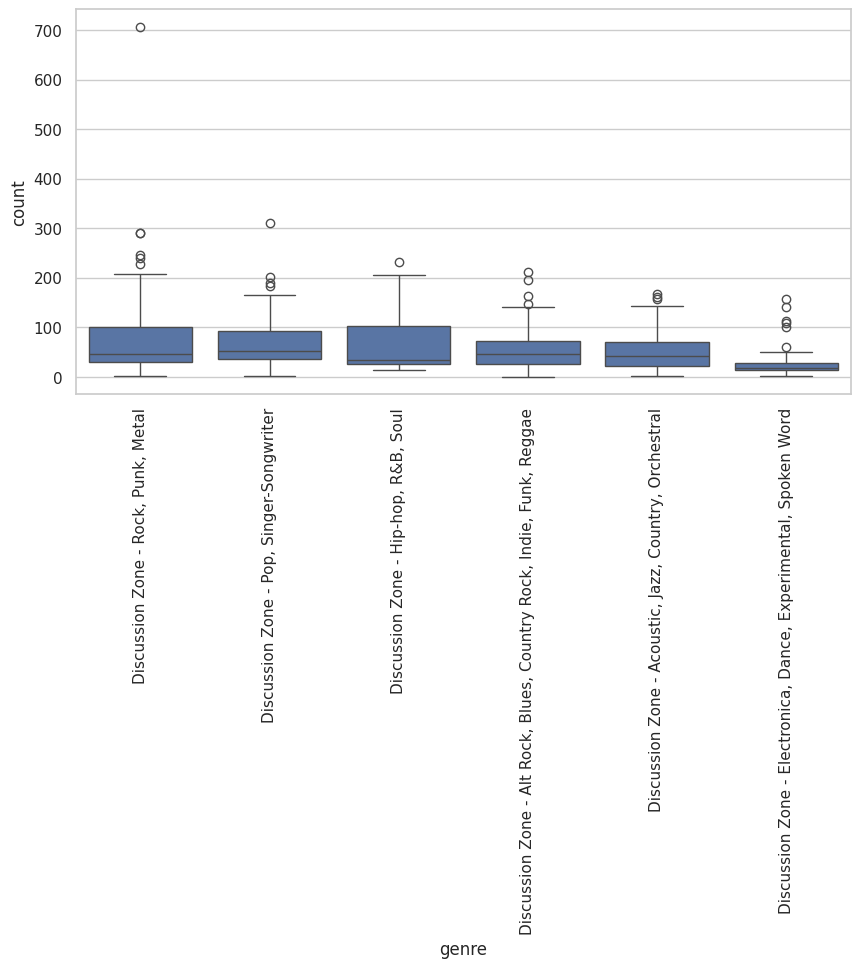

In [39]:

plot = sns.boxplot(x='genre', y='count', data=count_mixes)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [26]:
# print the first metadata_path
print(count_mixes['metadata_path'][0])

/data4/soumya/MSF_forum/dataset/Discussion Zone - Rock, Punk, Metal/Angels In Amplifiers: 'I'm Alright'
